In [1]:
import pandas as pd
from IPython.display import display
# Load datasets
df_benin = pd.read_csv('../src/data/benin-malanville.csv')
df_sierra = pd.read_csv('../src/data/sierraleone-bumbuna.csv')
df_togo = pd.read_csv('../src/data/togo-dapaong_qc.csv')

In [2]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    total_rows = len(df)
    cols_with_nulls = [col for col in df.columns if (df[col].isna().sum() / total_rows) > 0.05]
    print(f"Columns with >5% missing values in {name}: {cols_with_nulls}")

Columns with >5% missing values in Benin: ['Comments']
Columns with >5% missing values in Sierra Leone: ['Comments']
Columns with >5% missing values in Togo: ['Comments']


In [4]:
# Fill missing values
for df in [df_benin, df_sierra, df_togo]:
    # Numeric columns -> mean
    for col in df.select_dtypes(include='number').columns:
        df[col] = df[col].fillna(df[col].mean())
    # Categorical columns -> mode
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    print(f"Remaining missing values in {name}:")
    display(df.isna().sum())

Remaining missing values in Benin:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Remaining missing values in Sierra Leone:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Remaining missing values in Togo:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
for df in [df_benin, df_sierra, df_togo]:
    df.drop(columns=['Comments'], inplace=True)

In [7]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    print(f"Columns after dropping Comments in {name}:")
    display(df.head())

Columns after dropping Comments in Benin:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3

Columns after dropping Comments in Sierra Leone:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6  
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6  
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6  
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6  
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6

Columns after dropping Comments in Togo:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4

In [8]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    print(f"Summary Statistics for {name}:")
    display(df.describe())

Summary Statistics for Benin:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  
count  525600.000000  
mean       32.471736  
std        12.348743  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000

Summary Statistics for Sierra Leone:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  
count  525600.000000  
mean       32.593091  
std        12.009161  
min        11.100000  
25%        23.800000  
50%        26.900000  
75%        41.300000  
max        70.400000

Summary Statistics for Togo:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  
count  525600.000000  
mean       33.543330  
std        12.769277  
min        13.100000  
25%        23.600000  
50%        28.400000  
75%        43.000000  
max        94.600000

In [9]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [11]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    print(f"Missing values in key columns for {name}:")
    print(df[key_cols].isna().sum(), "\n")

Missing values in key columns for Benin:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64 

Missing values in key columns for Sierra Leone:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64 

Missing values in key columns for Togo:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64 



In [16]:
from scipy import stats
import numpy as np
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
    outliers = (z_scores > 3)
    num_outliers = outliers.sum(axis=0)
    print(f"Number of outliers in {name}:")
    print(num_outliers, "\n")

Number of outliers in Benin:
[  89    0 3738   27   63 3109 3500] 

Number of outliers in Sierra Leone:
[2477 7586 2986 1604 2041 3967 3665] 

Number of outliers in Togo:
[ 305 1062 3415  137  206 3510 3915] 



In [17]:
for df in [df_benin, df_sierra, df_togo]:
    for col in key_cols:
        median = df[col].median()
        z_scores = np.abs(stats.zscore(df[col]))
        df.loc[z_scores > 3, col] = median

In [19]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    remaining_outliers = (np.abs(stats.zscore(df[key_cols])) > 3).sum()
    print(f"Remaining outliers in {name}: {remaining_outliers}")

Remaining outliers in Benin: 3894
Remaining outliers in Sierra Leone: 14469
Remaining outliers in Togo: 4209


Check for missing values

In [20]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [21]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    print(f"Missing values in key columns for {name}:")
    print(df[key_cols].isna().sum())
    print()

Missing values in key columns for Benin:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Missing values in key columns for Sierra Leone:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Missing values in key columns for Togo:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64



Step 2 – Outlier Detection (Z-scores)

In [22]:
from scipy import stats
import numpy as np

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    z_scores = np.abs(stats.zscore(df[key_cols]))
    outliers_count = (z_scores > 3).sum()
    print(f"Number of outliers in {name}: {outliers_count}")

Number of outliers in Benin: 3894
Number of outliers in Sierra Leone: 14469
Number of outliers in Togo: 4209


Step 3 – Handle Outliers

In [23]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    for col in key_cols:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_index = np.where(z_scores > 3)[0]
        median_value = df[col].median()
        df.loc[outliers_index, col] = median_value
    print(f"Outliers in {name} replaced with median.")
    

Outliers in Benin replaced with median.
Outliers in Sierra Leone replaced with median.
Outliers in Togo replaced with median.


Next Step – Verify Outliers Are Gone

In [24]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    remaining_outliers = (np.abs(stats.zscore(df[key_cols])) > 3).sum()
    print(f"Remaining outliers in {name}: {remaining_outliers}")

Remaining outliers in Benin: 1519
Remaining outliers in Sierra Leone: 9090
Remaining outliers in Togo: 764


Next Step – Handle Remaining Outliers

In [25]:
for df in [df_benin, df_sierra, df_togo]:
    for col in key_cols:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = np.clip(df[col], mean - 3*std, mean + 3*std)

In [26]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    remaining_outliers = (np.abs(stats.zscore(df[key_cols])) > 3).sum()
    print(f"Remaining outliers in {name}: {remaining_outliers}")

Remaining outliers in Benin: 1522
Remaining outliers in Sierra Leone: 9834
Remaining outliers in Togo: 764


Next steps to complete Outlier Detection & Basic Cleaning:

In [27]:
for df in [df_benin, df_sierra, df_togo]:
    for col in key_cols:
        median = df[col].median()
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df.loc[np.abs(z_scores) > 3, col] = median

In [28]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    remaining_outliers = (np.abs(stats.zscore(df[key_cols])) > 3).sum()
    print(f"Remaining outliers in {name}: {remaining_outliers}")

Remaining outliers in Benin: 604
Remaining outliers in Sierra Leone: 11236
Remaining outliers in Togo: 415


In [29]:
for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    print(f"Missing values in key columns for {name}:\n{df[key_cols].isna().sum()}\n")

Missing values in key columns for Benin:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Missing values in key columns for Sierra Leone:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Missing values in key columns for Togo:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64



Save the cleaned datasets for future analysis:

In [30]:
df_benin.to_csv('../src/data/benin_cleaned.csv', index=False)
df_sierra.to_csv('../src/data/sierraleone_cleaned.csv', index=False)
df_togo.to_csv('../src/data/togo_cleaned.csv', index=False)

In [31]:
import os
os.makedirs('../data', exist_ok=True)

# Export cleaned DataFrames
df_benin.to_csv('../data/benin_clean.csv', index=False)
df_sierra.to_csv('../data/sierraleone_clean.csv', index=False)
df_togo.to_csv('../data/togo_clean.csv', index=False)

In [32]:
import os

print(os.listdir('../data'))

['benin_clean.csv', 'sierraleone_clean.csv', 'togo_clean.csv']


#Ensure Timestamp is a datetime object

In [33]:
df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])
df_sierra['Timestamp'] = pd.to_datetime(df_sierra['Timestamp'])
df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])

Set Timestamp as index (optional, but helps with plotting)

In [34]:
df_benin.set_index('Timestamp', inplace=True)
df_sierra.set_index('Timestamp', inplace=True)
df_togo.set_index('Timestamp', inplace=True)

Line plot for GHI, DNI, DHI, Tamb

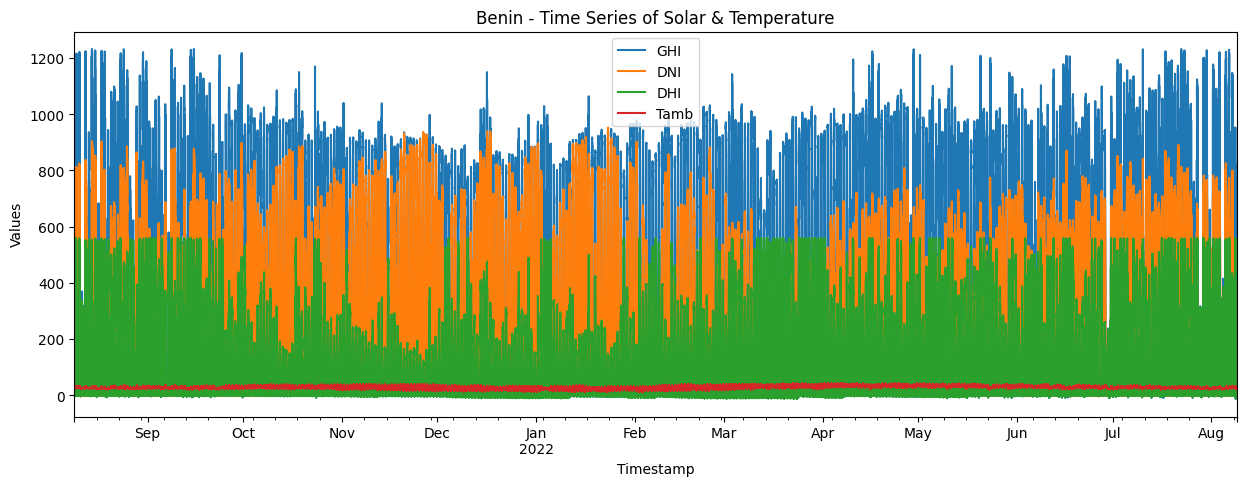

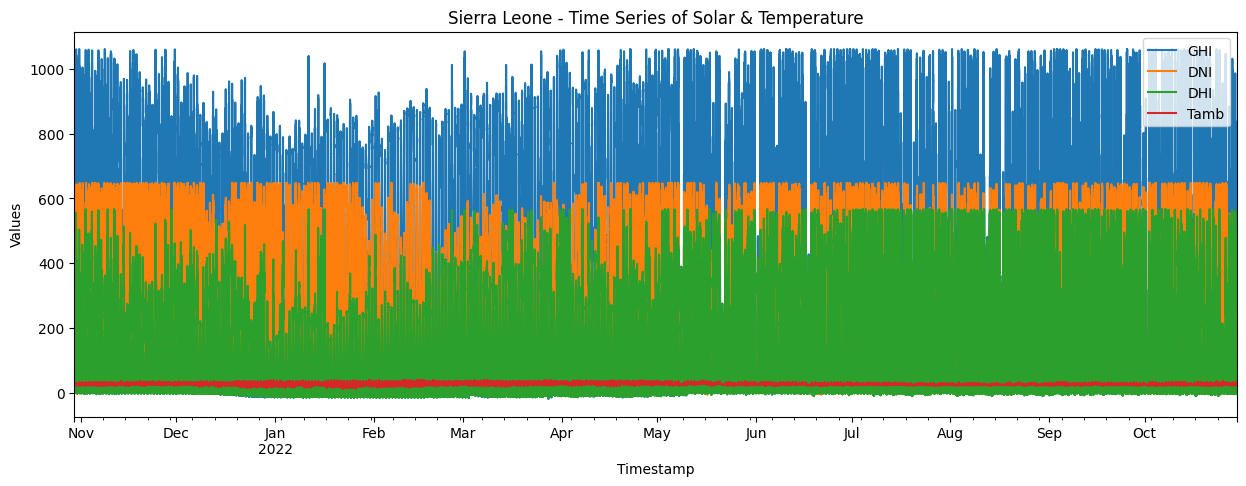

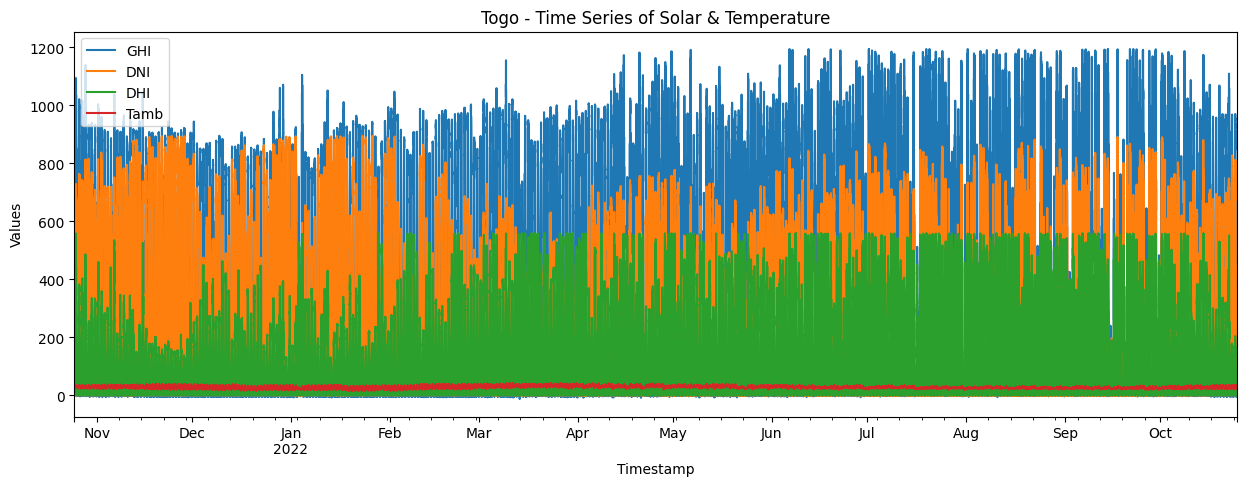

In [35]:
import matplotlib.pyplot as plt

key_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

for df, name in zip([df_benin, df_sierra, df_togo], ['Benin', 'Sierra Leone', 'Togo']):
    df[key_cols].plot(figsize=(15,5), title=f'{name} - Time Series of Solar & Temperature')
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.show()

Optional: observe patterns by month or hour

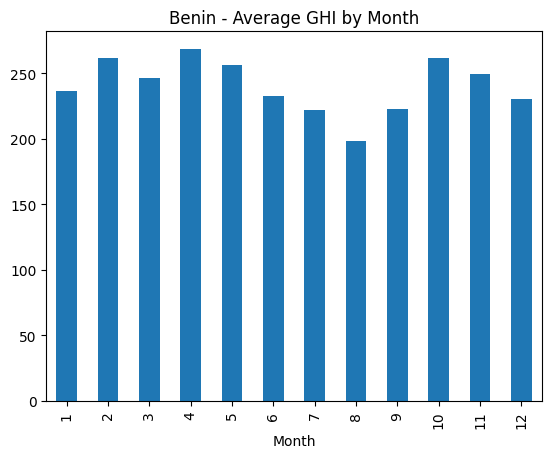

In [36]:
# Example: average GHI per month
df_benin['Month'] = df_benin.index.month
monthly_avg = df_benin.groupby('Month')['GHI'].mean()
monthly_avg.plot(kind='bar', title='Benin - Average GHI by Month')
plt.show()

: EDA → Cleaning Impact → per country.

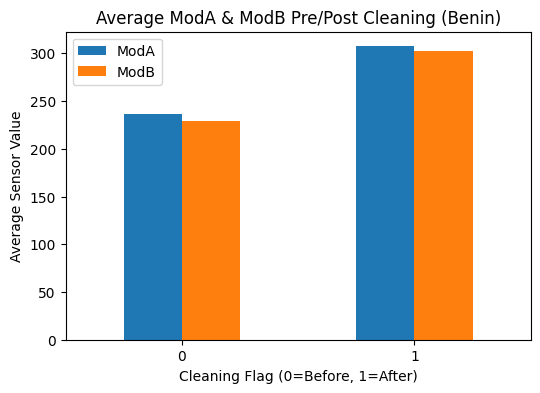

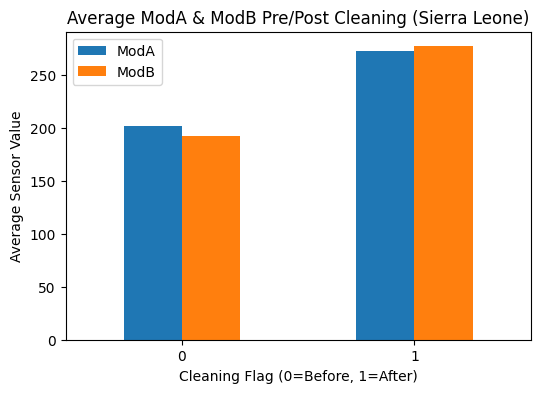

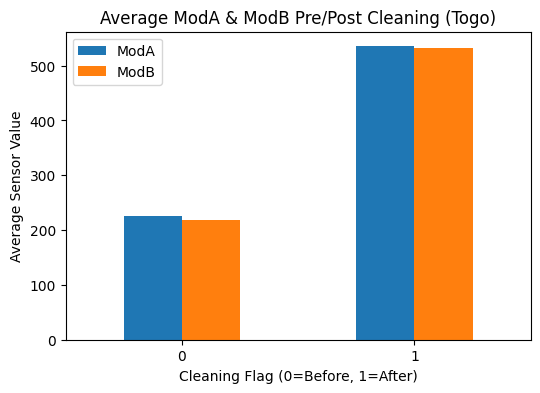

In [38]:
import matplotlib.pyplot as plt

# Dictionary of DataFrames
dfs = {'Benin': df_benin, 'Sierra Leone': df_sierra, 'Togo': df_togo}

for country, df in dfs.items():
    # Group by Cleaning flag and compute mean
    cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    
    # Plot
    cleaning_avg.plot(kind='bar', figsize=(6,4))
    plt.title(f'Average ModA & ModB Pre/Post Cleaning ({country})')
    plt.ylabel('Average Sensor Value')
    plt.xlabel('Cleaning Flag (0=Before, 1=After)')
    plt.xticks(rotation=0)
    plt.show()

Correlation Heatmap

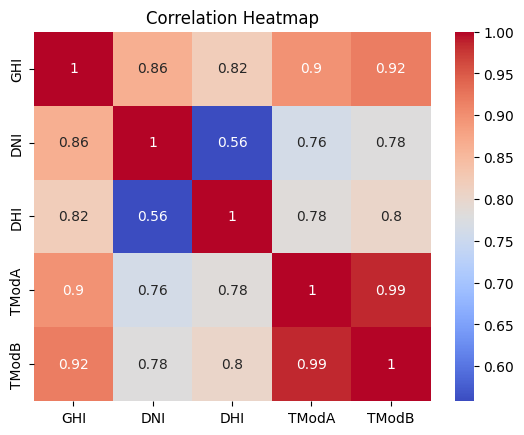

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['GHI','DNI','DHI','TModA','TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Scatter plot

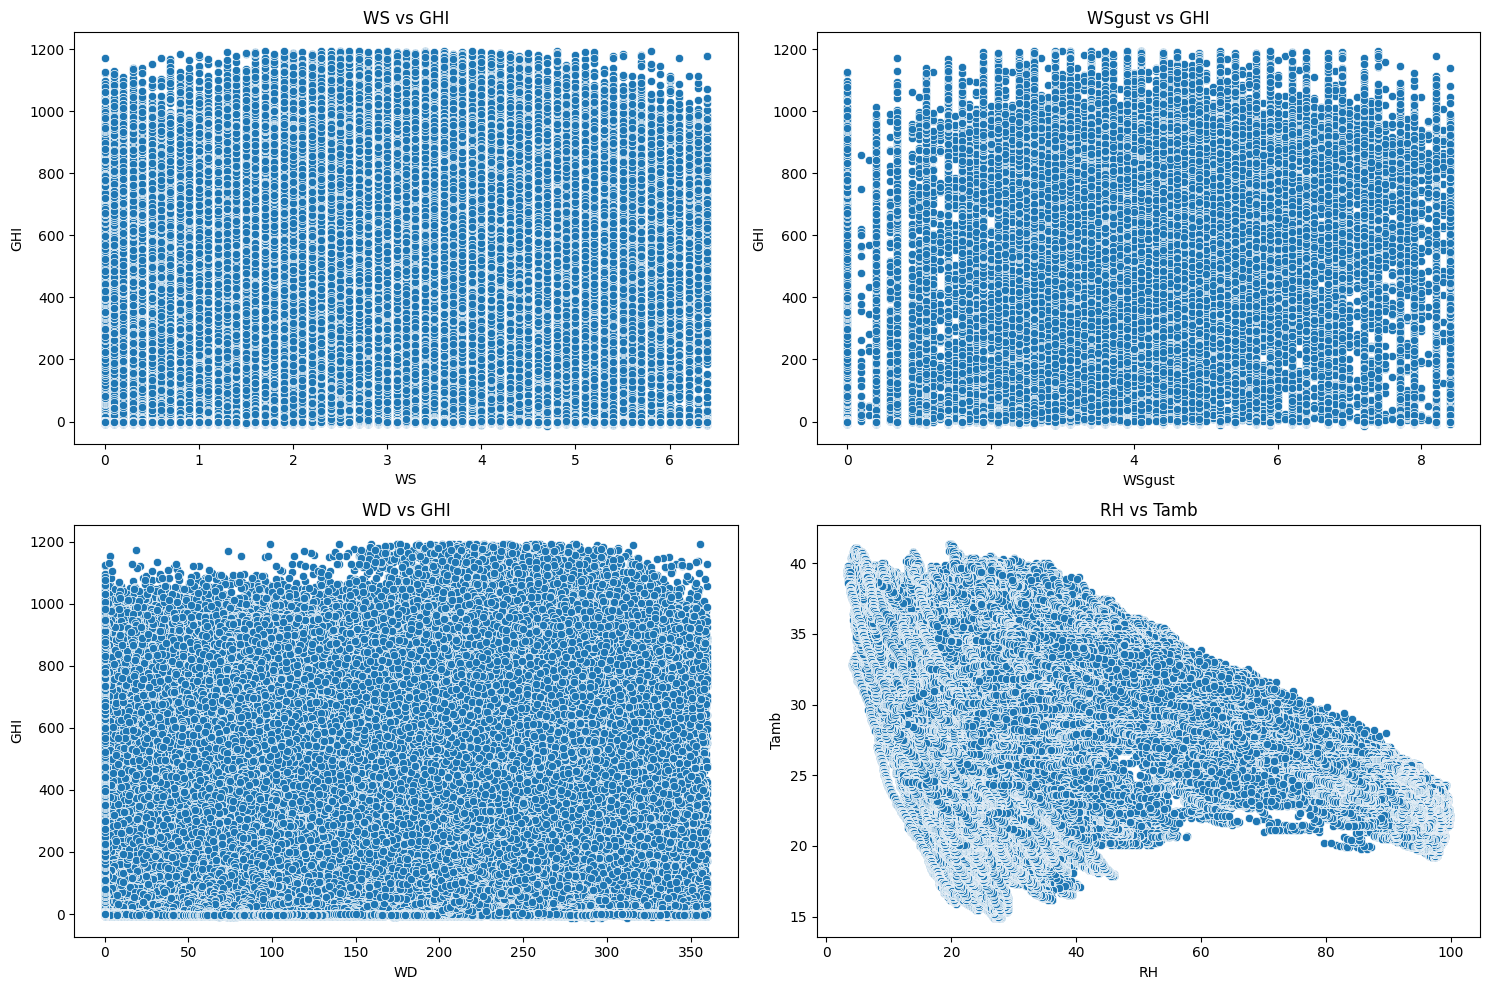

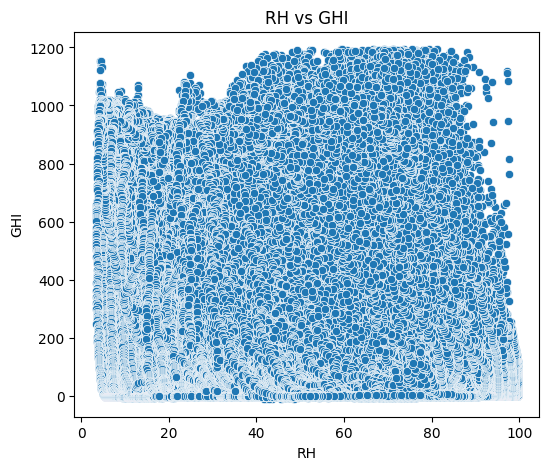

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key scatter plots
plt.figure(figsize=(15,10))

# WS vs GHI
plt.subplot(2,2,1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs GHI')

# WSgust vs GHI
plt.subplot(2,2,2)
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('WSgust vs GHI')

# WD vs GHI
plt.subplot(2,2,3)
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('WD vs GHI')

# RH vs Tamb
plt.subplot(2,2,4)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Tamb')

plt.tight_layout()
plt.show()

# Optional: RH vs GHI
plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs GHI')
plt.show()

Wind & Distribution Analysis for each country using matplotlib, pandas, and windrose

<Figure size 600x600 with 0 Axes>

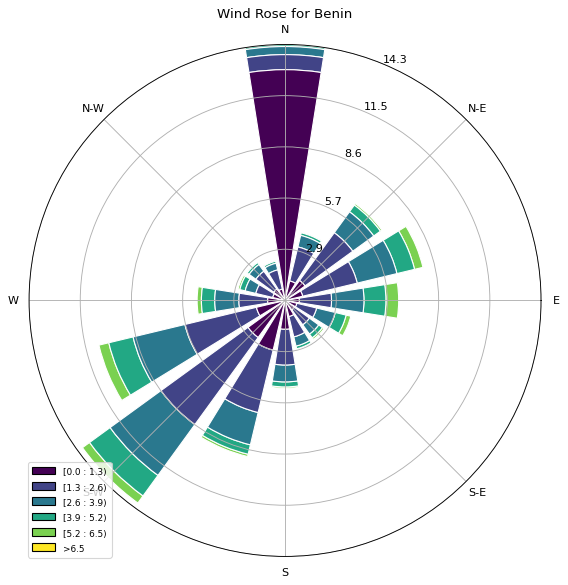

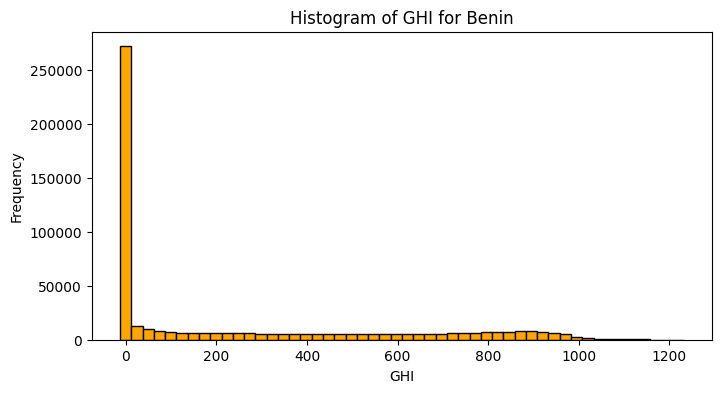

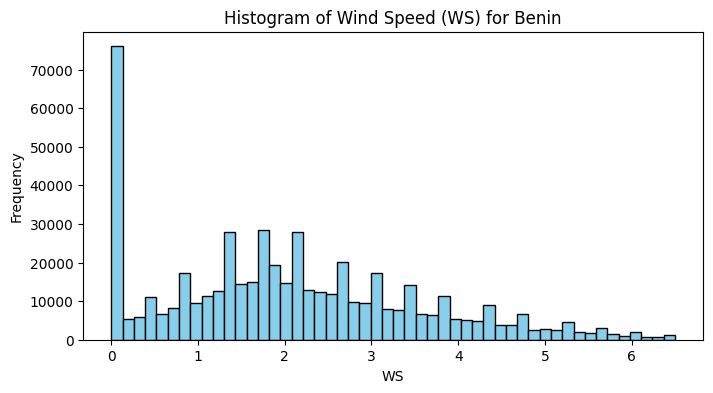

<Figure size 600x600 with 0 Axes>

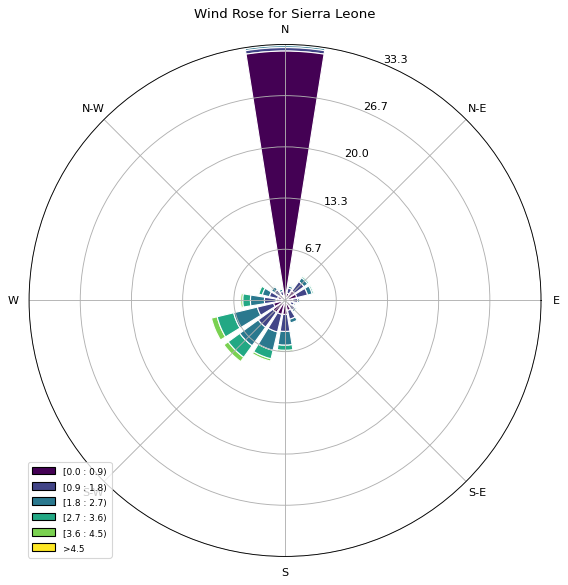

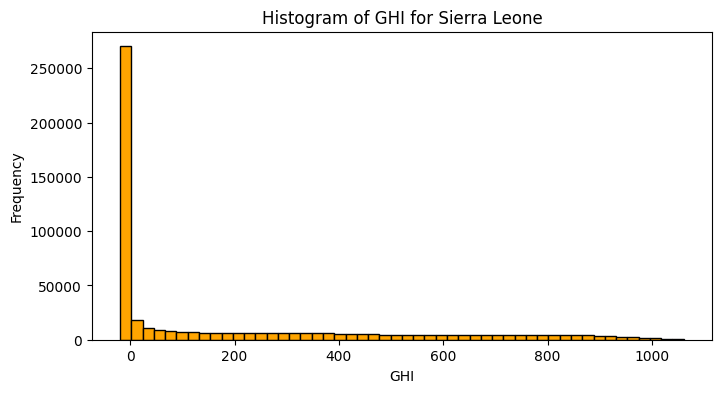

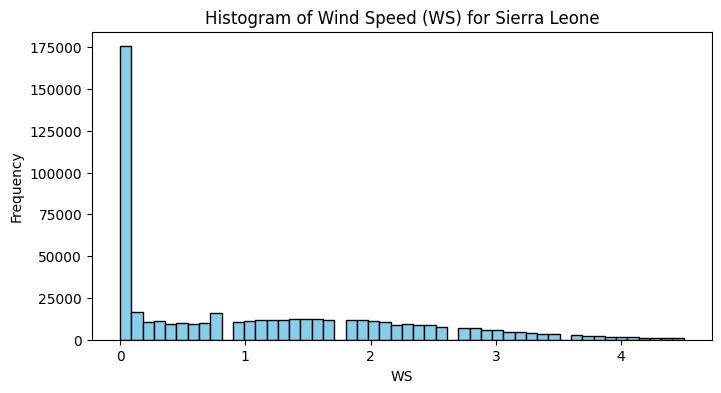

<Figure size 600x600 with 0 Axes>

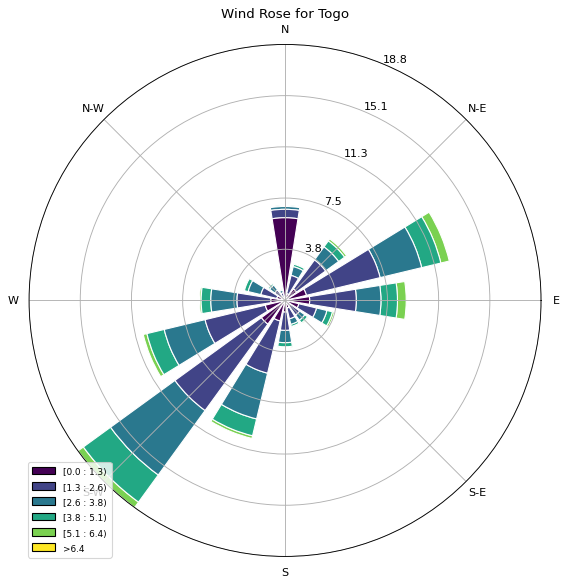

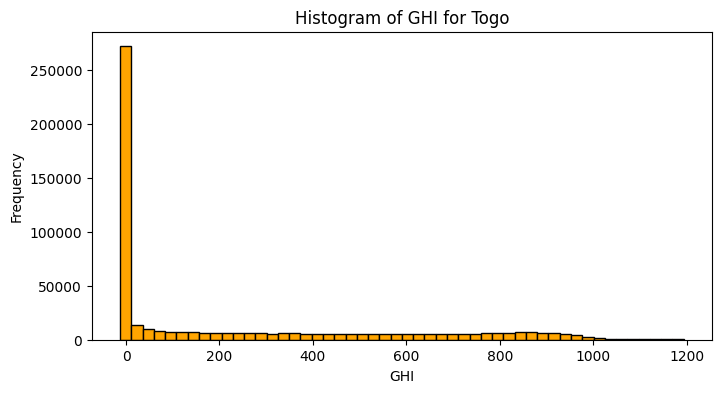

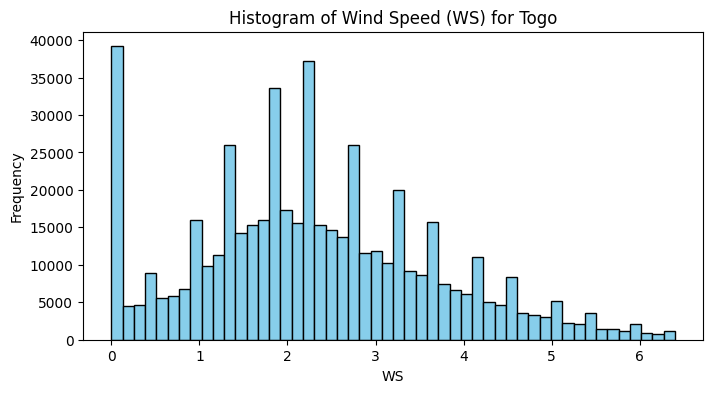

In [44]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# List of DataFrames and country names
dfs = [df_benin, df_sierra, df_togo]
countries = ['Benin', 'Sierra Leone', 'Togo']

for df, country in zip(dfs, countries):
    # --- Wind Rose ---
    plt.figure(figsize=(6,6))
    ax = WindroseAxes.from_ax()
    ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_title(f'Wind Rose for {country}')
    ax.set_legend()
    plt.show()
    
    # --- Histogram of GHI ---
    plt.figure(figsize=(8,4))
    plt.hist(df['GHI'], bins=50, color='orange', edgecolor='black')
    plt.title(f'Histogram of GHI for {country}')
    plt.xlabel('GHI')
    plt.ylabel('Frequency')
    plt.show()
    
    # --- Histogram of WS ---
    plt.figure(figsize=(8,4))
    plt.hist(df['WS'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Wind Speed (WS) for {country}')
    plt.xlabel('WS')
    plt.ylabel('Frequency')
    plt.show()

Temperature Analysis (RH vs Temperature / Solar Radiation)

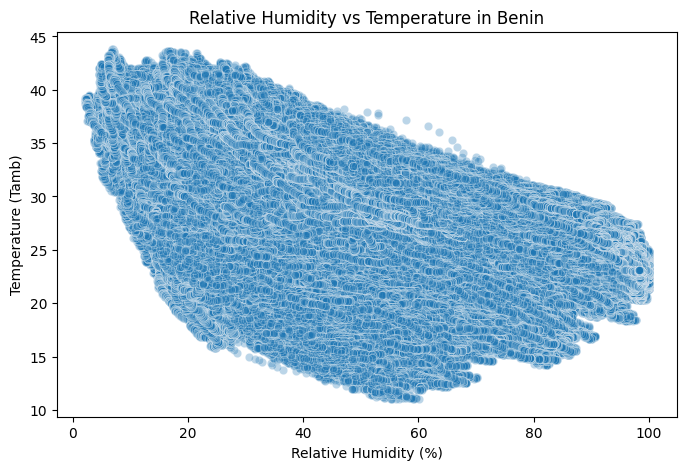

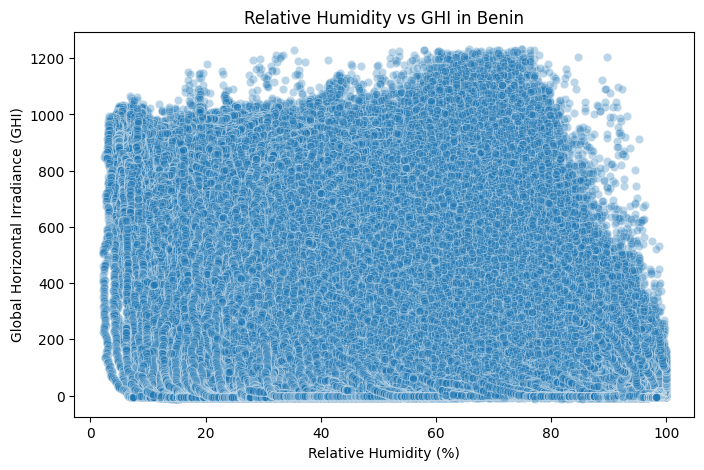

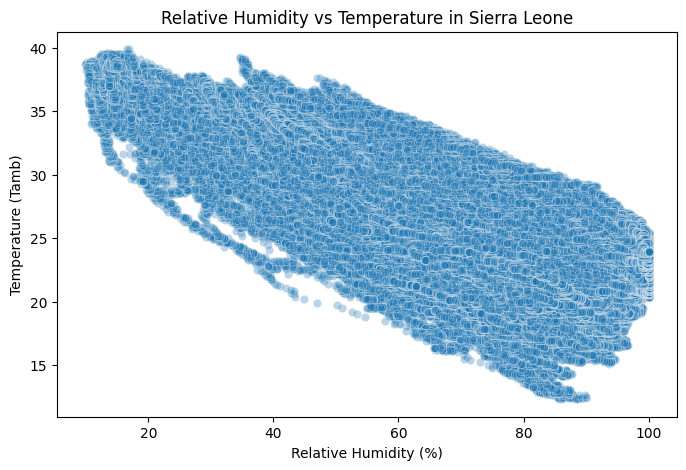

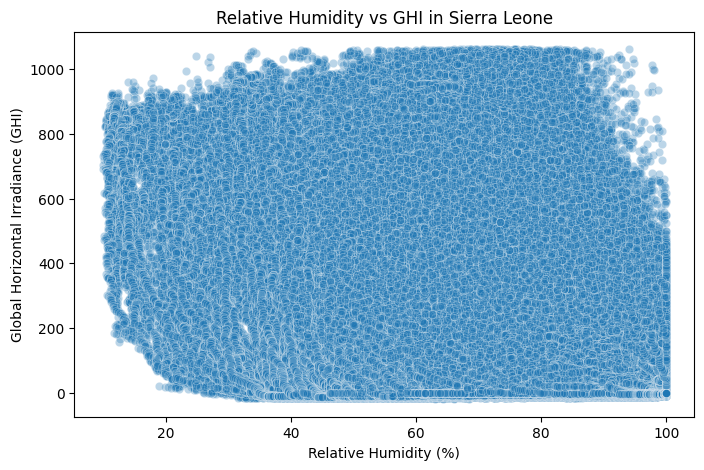

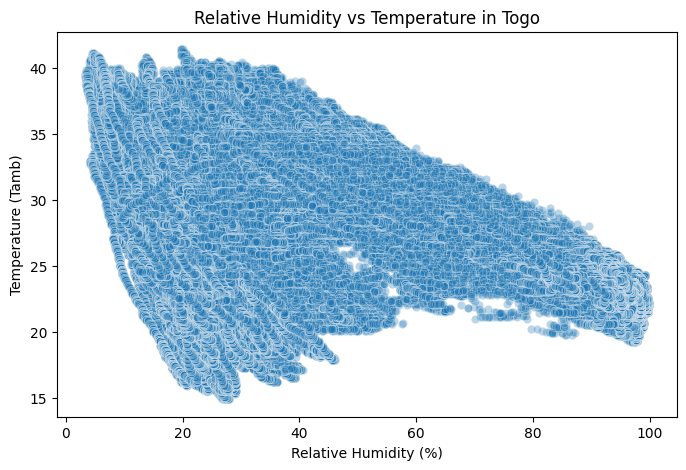

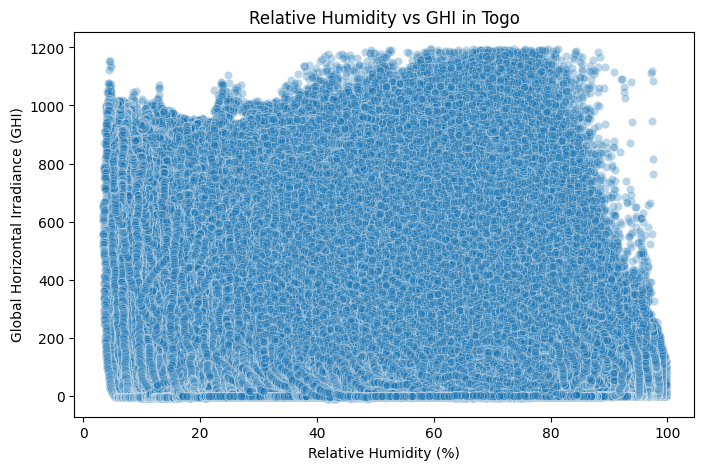

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of dataframes and names
dfs = [df_benin, df_sierra, df_togo]
names = ['Benin', 'Sierra Leone', 'Togo']

for df, name in zip(dfs, names):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.3)
    plt.title(f'Relative Humidity vs Temperature in {name}')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (Tamb)')
    plt.show()
    
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.3)
    plt.title(f'Relative Humidity vs GHI in {name}')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.show()

Bubble Chart (GHI vs Tamb with bubble size = RH or BP)

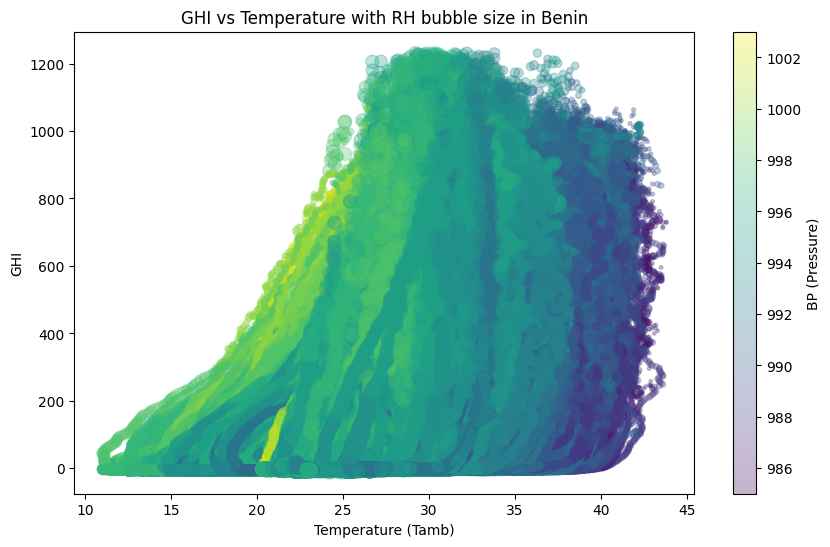

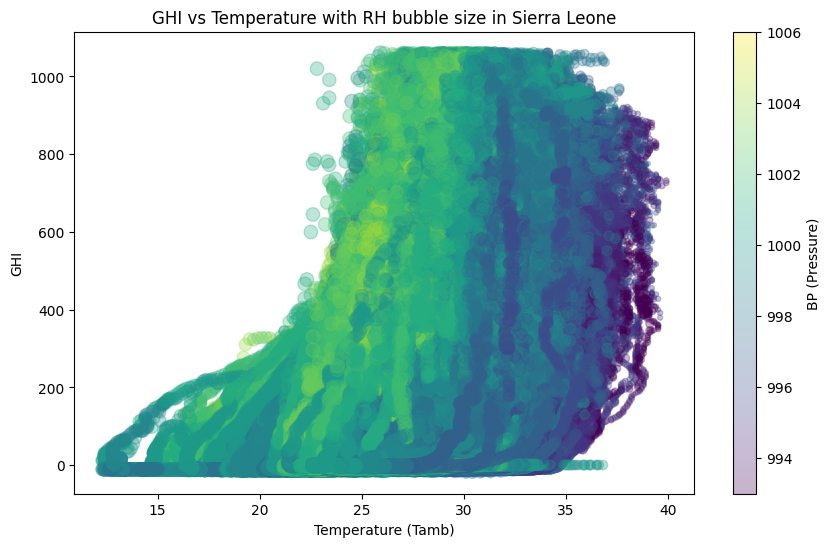

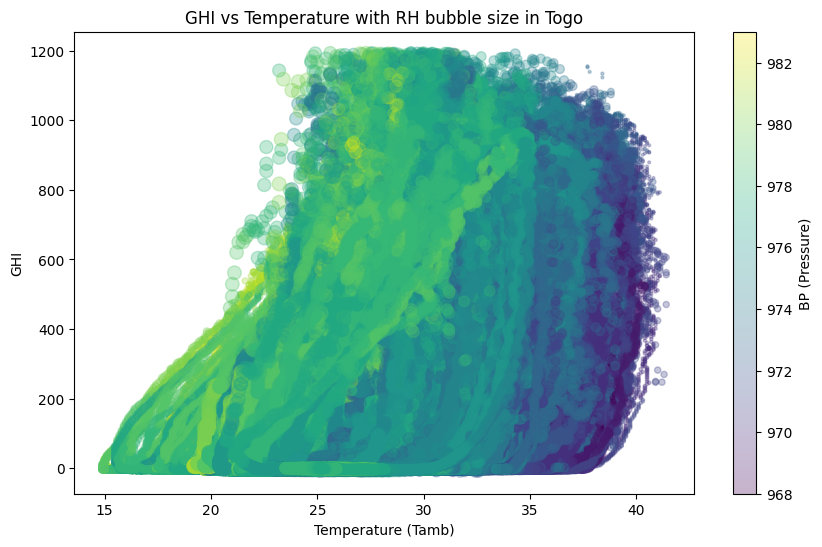

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
for df, name in zip(dfs, names):
    plt.figure(figsize=(10,6))
    plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.3, c=df['BP'], cmap='viridis')
    plt.colorbar(label='BP (Pressure)')
    plt.title(f'GHI vs Temperature with RH bubble size in {name}')
    plt.xlabel('Temperature (Tamb)')
    plt.ylabel('GHI')
    plt.show()

In [49]:
import os
os.makedirs('../src/data', exist_ok=True)

# Export cleaned DataFrames
df_benin.to_csv('../src/data/benin_clean.csv', index=False)
df_sierra.to_csv('../src/data/sierraleone_clean.csv', index=False)
df_togo.to_csv('../src/data/togo_clean.csv', index=False)